In [2]:
import tweepy
import json
import pandas as pd
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt

import operator
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer
import datetime

now = datetime.datetime.now()

C:\Users\scham\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\scham\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\scham\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\scham\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\scham\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\scham\Anaconda3\lib\s

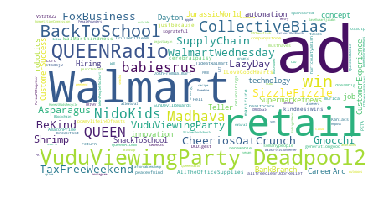

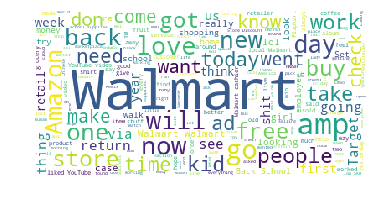

                      id          created_at  retweet_count user_screen_name  \
0    1027951916762972162 2018-08-10 16:16:50          12486        DaReal_PG   
1    1027951894034038787 2018-08-10 16:16:44              0  KrauseHolsteins   
2    1027951893019090945 2018-08-10 16:16:44              0   ImmCREO_BITCHH   
3    1027951841563295744 2018-08-10 16:16:32              0      nitsthegame   
4    1027951838832861187 2018-08-10 16:16:31              0    JHUCCIthebrat   
5    1027951833694855168 2018-08-10 16:16:30              0         lowegrls   
6    1027951829655670790 2018-08-10 16:16:29            132      jamessgonzo   
7    1027951827088592896 2018-08-10 16:16:28              0          dbuis56   
8    1027951811590729730 2018-08-10 16:16:24              0  RichardFPelaez4   
9    1027951806456971264 2018-08-10 16:16:23             23       ayyeBoogie   
10   1027951762336956416 2018-08-10 16:16:13              0        ASOIideas   
11   1027951757119221760 2018-08-10 16:1

In [5]:
#Authentication

consumer_key = "x"
consumer_secret = "x"
access_token = "x"
access_token_secret = "x"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) #Interacting with twitter's API
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API (auth, wait_on_rate_limit = True) #creating the API object

#list1 = ["Walmart", "bostonsci","AbbottNews","LandOLakesInc","Cargill" ]
list1 = ["Walmart" ]
for company_id in list1:
    #Extracting Tweets
    results = []
    for tweet in tweepy.Cursor (api.search, q = company_id, lang = "en").items(1000): 
        results.append(tweet)
        
    #Store tweets data in a dataframe
    
    def tweets_df(results):
        id_list = [tweet.id for tweet  in results]
        data_set = pd.DataFrame(id_list, columns = ["id"])
        
        data_set["text"] = [tweet.text for tweet in results]
        data_set["created_at"] = [tweet.created_at for tweet in results]
        data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
        data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
        data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
        data_set["user_location"] = [tweet.author.location for tweet in results]
        data_set["Hashtags"] = [tweet.entities.get('hashtags') for tweet in results]
        
        return data_set
    data_set = tweets_df(results)
    
    
    # Remove tweets with duplicate text
    
    text = data_set["text"]
    
    for i in range(0,len(text)):
        txt = ' '.join(word for word in text[i] .split() if not word.startswith('https:'))
        data_set.set_value(i, 'text2', txt)
        
    data_set.drop_duplicates('text2', inplace=True)
    data_set.reset_index(drop = True, inplace=True)
    data_set.drop('text', axis = 1, inplace = True)
    data_set.rename(columns={'text2': 'text'}, inplace=True)
    
    text = data_set["text"]
    
    for i in range(0,len(text)):
        textB = TextBlob(text[i])
        sentiment = textB.sentiment.polarity
        data_set.set_value(i, 'Sentiment',sentiment)
        if sentiment <0.00:
            SentimentClass = 'Negative'
            data_set.set_value(i, 'SentimentClass', SentimentClass )
        elif sentiment >0.00:
            SentimentClass = 'Positive'
            data_set.set_value(i, 'SentimentClass', SentimentClass )
        else:
            SentimentClass = 'Neutral'
            data_set.set_value(i, 'SentimentClass', SentimentClass )
            
    Htag_df = pd.DataFrame()
    j = 0
    
    for tweet in range(0,len(results)):
        hashtag = results[tweet].entities.get('hashtags')
        for i in range(0,len(hashtag)):
            Htag = hashtag[i]['text'] 
            Htag_df.set_value(j, 'Hashtag',Htag)
            j = j+1
    
    
    # Join all the text from the 1000 tweets
    Hashtag_Combined = " ".join(Htag_df['Hashtag'].values.astype(str))
    
    ht = " ".join([word for word in Hashtag_Combined.split()])
    
    text_Combined = " ".join(data_set['text'].values.astype(str))    
    text_final = " ".join([word for word in text_Combined.split()
                                    if word != 'RT'
                                    ])
    #Tweet_mask = imread("twitter_mask.png", flatten=True)
    
    #Create a Word Cloud
    wc = WordCloud(background_color="white", stopwords=STOPWORDS )
    wc.generate(ht)
    plt.imshow(wc)
    plt.axis("off")
    plt.savefig(str(now.day) + company_id + 'Overall_Hashtag_wordCloud.png', dpi=300)
    plt.show()
    
    wc2 = WordCloud(background_color="white", stopwords=STOPWORDS )
    wc2.generate(text_final)
    plt.imshow(wc2)
    plt.axis("off")
    plt.savefig(str(now.day) + company_id + 'Overall_Allwords_wordCloud.png', dpi=300)
    plt.show()
    
    
    import pandas as pd
    
    results_df = pd.DataFrame(Htag_df)
    Htag_df.to_csv(str(now.day) + company_id + "Overall_Hashtag.csv")
    data_set.to_csv(str(now.day) + company_id + "Overall_Tweets.csv")
    
    data_set
    
    #data_set["rank"] = data_set[""]

In [26]:
def most_retweets(data):
    data["rank"] = data["retweet_count"].rank(ascending = False)
    top = data["text"][data["rank"] < 4]
    a = top.tolist()
    remove = []
    final = []
    for sentence in a:
        remove.append(sentence.split(":"))
    for item in remove:
        if len(item) < 3:
            final.append(item[1])
        if len(item) > 2:
            final.append(item[1] + item[2])

    for i in range(3):
        if i == 0:
            print("The tweet with the most retweets is:")
            print(final[i])
            print("")
        if i == 1:
            print("The tweet with the 2nd most retweets  is:")
            print(final[i])
            print("")
        if i == 2:
            print("The tweet with the 3rd most retweets is:")
            print(final[i])
            print("")

  

In [27]:
most_retweets(data_set)

The tweet with the most retweets is:
 A man walking around the Walmart parking lot in the blazing heat handed me a hand written business card offering lawn se…

The tweet with the 2nd most retweets is:
 "I just wanted to make her day special" Walmart cashier steps in to paint disabled woman's nails when salon refuses.

The tweet with the 3rd most retweets is:
 I cant sleep gotta get 2 walmart



In [68]:
def best_and_worst_tweets(data):
    data["best"] = data["Sentiment"].rank(ascending = False, method = "min")
    data["worst"] = data["Sentiment"].rank(method = "min")
    top = data["text"][data["best"] < 2]
    bottom = data["text"][data["worst"] < 2]
    a = top.tolist()
    b = bottom.tolist()
    remove = []
    final = []
    
    print("Tweets with the Highest Positive Ranking")
    for i in range(len(a)):
        print("{0}. {1}".format(i + 1,a[i]))
        print("")
    print("")
    print("")  
    
    
    print("Tweets with the Highest Negative Ranking")
    for i in range(len(b)):
        print("{0}. {1}".format(i + 1,b[i]))
        print("")
    

In [69]:
best_and_worst_tweets(data_set)

Tweets with the Highest Positive Ranking
1. RT @OriginalFunko: RT &amp; follow @OriginalFunko for the chance to win a @Walmart exclusive Invisible Ghost Pop!

2. @tcraigggg The one from Walmart with the rabbit has excellent wipe stamina

3. RT @benensonj: This woman who works at Walmart demonstrates the decency and humanity that reflects the best of America. What would make an…

4. RT @spencergnauck: My t.u. Walmart t shirt dad was telling this Canadian professor that we met in Norway how awesome Austin and “UT” are an…

5. @VuduFans @Walmart These are spectacular!!! #VuduViewingParty #Deadpool2

6. @VuduFans @Walmart Awesome. Cant wait for the #VuduViewingParty tonight!!

7. RT @mandipie4u: #AD Buy @Always &amp; @Tampax @Walmart for a chance to win a designer bag for all your time of the month necessities! #YesPle…

8. She-Loves-Me Custom T Shirts | - awesome phone cases ORDER ...



Tweets with the Highest Negative Ranking
1. RT @skyepuppy: Shocking display of PLASTIC STRAWS spotted 